In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('car_purchasing.csv',encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
df.info()      
df.describe()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [6]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

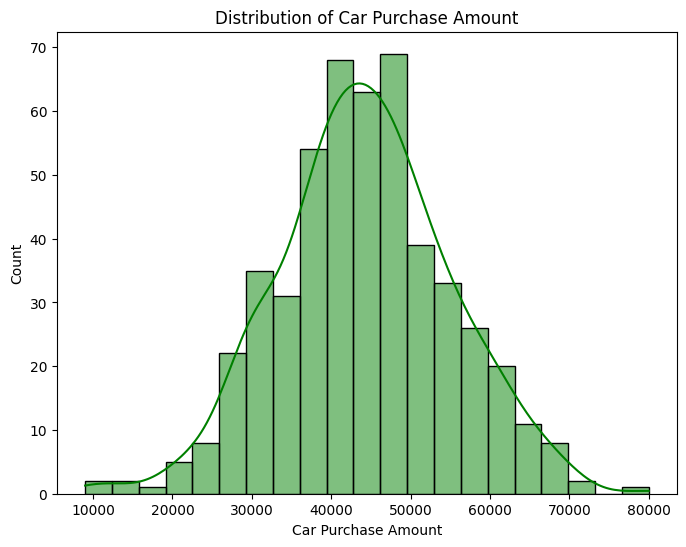

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df['car purchase amount'], kde=True, color='green')
plt.title('Distribution of Car Purchase Amount')
plt.xlabel('Car Purchase Amount')
plt.show()


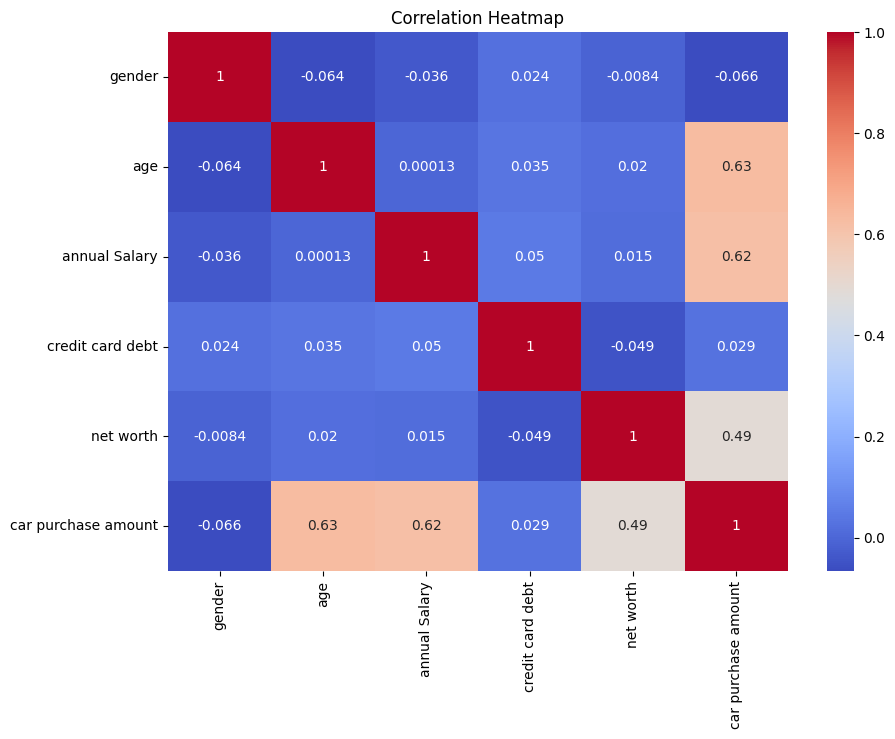

In [9]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Now create the heatmap with numeric columns only
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [10]:
df = df.drop(['customer name', 'customer e-mail'], axis=1)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply label encoding on 'country'
df['country'] = le.fit_transform(df['country'])


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Scale all the remaining columns except the target ('car purchase amount')
columns_to_scale = ['gender', 'age', 'annual Salary', 'credit card debt', 'net worth']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [12]:
df.head()


,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,27,0.0,0.437034,0.535151,0.578361,0.223430,35321.45877
1,17,0.0,0.417412,0.583086,0.476028,0.521402,45115.52566
2,1,1.0,0.463058,0.422482,0.555797,0.631089,42925.70921
3,41,1.0,0.765427,0.742125,0.719908,0.539387,67422.36313
4,26,1.0,0.746275,0.496614,0.264257,0.551331,55915.46248


In [13]:
# Features and Target
X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

In [14]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (400, 6)
Test set shape: (100, 6)


In [15]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [16]:
y_pred = lr_model.predict(X_test)


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 2.10
Root Mean Squared Error (RMSE): 1.45
R² Score: 1.00


In [18]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)
# Predict on test data
y_pred_rf = rf_model.predict(X_test)
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")


Random Forest Mean Squared Error (MSE): 5539692.26
Random Forest Root Mean Squared Error (RMSE): 2353.66
Random Forest R² Score: 0.95


In [19]:
import joblib

# Save your trained model
joblib.dump(lr_model, 'car_sales_prediction_model.pkl')

print("Model saved successfully as car_sales_prediction_model.pkl")


Model saved successfully as car_sales_prediction_model.pkl
